In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv
/kaggle/input/salary-prediction-data-simple-linear-regression/Salary Data.csv


**Data Preprocessing and Exploation**

In [2]:
import pandas as pd
#Loading the dataset
df=pd.read_csv("/kaggle/input/salary-prediction-data-simple-linear-regression/Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
#Checking for missing values
print('Missing values :', df.isnull().sum())

Missing values : YearsExperience    0
Salary             0
dtype: int64


In [4]:
#Displaying the basic info about the data set(data types and non-null counts)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
#Displaying the summary statistic for numerical columns
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
#Checking for duplicates
print("Duplicates rows:",df.duplicated().sum())

Duplicates rows: 0


In [7]:
#Checking the unique values for each column
df.nunique()

YearsExperience    28
Salary             30
dtype: int64

**Visualize the Data**

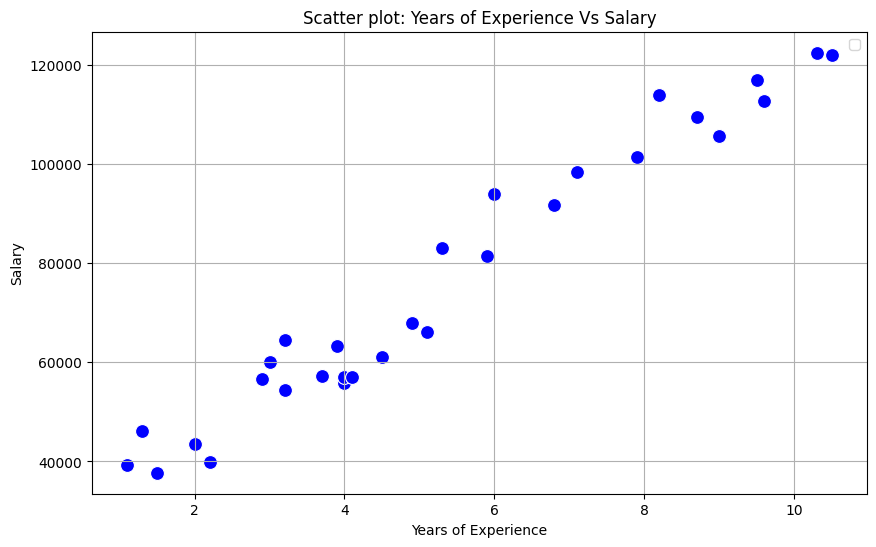

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#Creating a scatter plot to visualize the relationship between Years of Experience & Salary 
plt.figure(figsize=(10,6))
sns.scatterplot(x='YearsExperience',y='Salary',data=df,color='b',s=100)
plt.title('Scatter plot: Years of Experience Vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.legend()
plt.show()

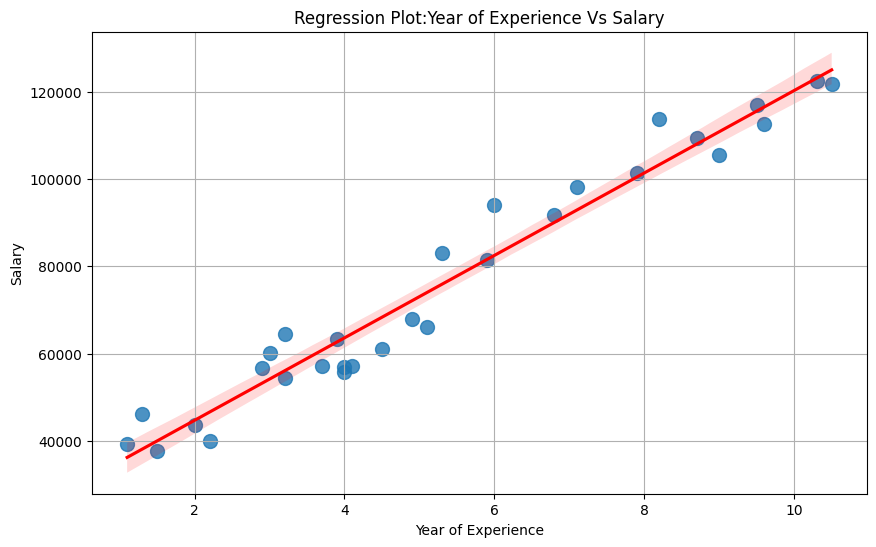

In [9]:
#Visualize the linear relationship using seaborn's regplot
plt.figure(figsize=(10,6))
sns.regplot(x='YearsExperience',y='Salary',data=df,scatter_kws={'s':100},line_kws={'color':'red'})
plt.title("Regression Plot:Year of Experience Vs Salary")
plt.xlabel("Year of Experience")
plt.ylabel("Salary")
plt.grid(True)
plt.show()

**Modeling**

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

#Define Features & Target Variable
x=df[['YearsExperience']]
y=df['Salary']
#Splitting the dataset into training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
#Creating & training the Linear Regression Model
model=LinearRegression()
model.fit(x_train,y_train)
#Making prediction on the training and testing data
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)
#Evaluating the model performance
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

#Printing results
print(f"Training MSE:{train_mse}")
print(f"Testing MSE:{test_mse}")
print(f"Training R2:{train_r2}")
print(f"Testing R2:{test_r2}")

Training MSE:27102249.73126139
Testing MSE:49830096.85590839
Training R2:0.9645401573418146
Testing R2:0.9024461774180497


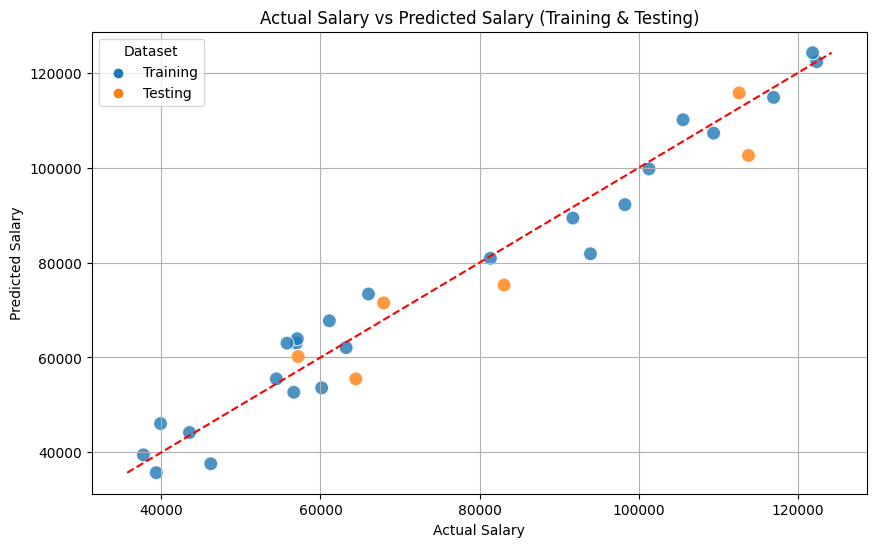

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Creating a data frame for actual vs. predicted values
train_results = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_pred, 'Dataset': 'Training'}) 
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred, 'Dataset': 'Testing'}) 
combined_results = pd.concat([train_results, test_results])  

# Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', hue='Dataset', data=combined_results, s=100, alpha=0.8)
plt.plot(
    [min(combined_results['Actual'].min(), combined_results['Predicted'].min()) - 1,
     max(combined_results['Actual'].max(), combined_results['Predicted'].max()) + 1],
    [min(combined_results['Actual'].min(), combined_results['Predicted'].min()) - 1,
     max(combined_results['Actual'].max(), combined_results['Predicted'].max()) + 1],
    'r--'
)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual Salary vs Predicted Salary (Training & Testing)')
plt.grid(True)
plt.legend(title="Dataset")
plt.show()
